In [ ]:
# Clustering topics using density-based algorithms, in particular DBSCAN

In [161]:
# Set the class of tweets specifying the correct file
import pandas as pd
df_model = pd.read_csv('../data/negative_post_rebalancing.csv')

In [162]:
# Set the proper range of dates to analyze
df_model_old = df_model.loc[df_model['Datetime'] >= '2022-05-14']
df_model_old = df_model.loc[df_model['Datetime'] <= '2022-05-18']

In [164]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df_model_old.Text.values
vectorizer = TfidfVectorizer(stop_words = stop_words,max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()
df_model = pd.DataFrame(X.toarray(),columns=words)

In [167]:
def show_clusters_size(clusters):
    unique, counts = np.unique(clusters, return_counts=True)
    print(dict(zip(unique, counts)))

# DBSCAN

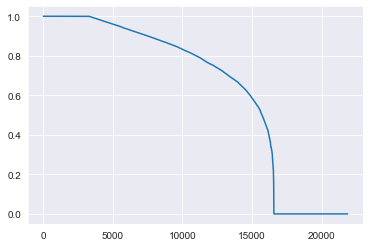

In [168]:
# k-dist function with MinPts = 2 * dimensions
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=200)
neighbors_fit = neighbors.fit(df_model)
distances, indices = neighbors_fit.kneighbors(df_model)
distances = np.sort(distances, axis=0)[::-1]
distances = distances[:,1]
plt.plot(distances)

In [174]:
# Parameters chosen using k-dist heuristic
eps = 0.7
minPts = 100

In [175]:
import time
from sklearn.cluster import DBSCAN

t0 = time.time()
dbscan = DBSCAN(eps=eps, min_samples=minPts,metric='cosine').fit(df_model)
t_dbscan = time.time() - t0
print("DBSCAN required", t_dbscan, "seconds")
predictions = dbscan.fit_predict(df_model)
Clusters = predictions

DBSCAN required 22.3233859539032 seconds


In [176]:
show_clusters_size(Clusters)

{-1: 21065, 0: 603, 1: 110, 2: 102}


In [178]:
df_model_old['Class'] = predictions

In [179]:
df_model_old.to_csv("DBSCAN1405.csv",index=False)